In [64]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import scipy.stats as sps

def plot_empirical(sample, weights): 
  hist, edges = np.histogram(sample, bins=len(sample))
  Y = hist.cumsum()
  plt.plot(sample, sample, "red", label="distribution")
  for i in range(len(Y)):
    plt.plot([edges[i], edges[i+1]],[weights[i], weights[i]], c="blue")
  plt.figure(figsize=(24,20))
  plt.show()

def histF(sample):
  N = 5
  left = [i / N for i in range(N)]
  right = [i / N for i in range(1, N+1)]
  vj = [0.0 for i in range(N)]
  for i in range(len(sample)):
    for j in range(N):
      if (sample[i] >= left[j]) & (sample[i] <= right[j]):
        vj[j]+=1
  plt.hist(sample)
  

def getVar(sample, sizeS):
  sam = np.sort(sample)
  val = sam[0]
  a = [1/sizeS]
  k = 1
  k1 = 1
  dif = [sam[0]]
  for i in range(1, sizeS):
    if val == sam[i]:
      k+=1
    else:
      val = sam[i]
      a.append(k/sizeS+a[k1-1])
      dif.append(sam[i])
      k1+=1
      k = 1
  return dif, a

mean = 2
variance = 0.5
eps = 0.17
alpha = 0.05

In [63]:
from matplotlib.rcsetup import update_savefig_format
N_size = 50
U_size = 30
U1 = [0.764, 2.668, 2.260, 2.226, 1.333, 1.695, 1.982, 2.320, 2.390, 2.281, 1.656, 2.518, 2.682, 1.518, 1.741, 2.362, 1.373, 2.008, 1.166, 1.393]
U2 = [2.680, 2.789, 2.843, 2.519, 2.374, 1.331, 2.767, 0.722, 3.061, 2.525, 1.833, 2.234, 1.199, 1.745, 2.236, 2.483, 1.091, 3.394, 1.803, 1.419, 2.665, 2.239, 2.138, 1.598, 1.057, 1.428, 3.581, 2.560, 0.840, 0.672]
N_sample = [0.764, 2.268, 2.680, 2.789, 2.843,
            2.260, 2.226, 2.519, 2.374, 1.331, 
            1.333, 1.695, 2.767, 0.722, 3.061,
            1.982, 2.320, 2.525, 1.833, 2.234, 
            2.390, 2.281, 1.199, 1.745, 2.236,
            1.656, 2.518, 2.483, 1.091, 3.394,
            2.862, 1.518, 1.803, 1.419, 2.665,
            1.741, 2.362, 2.239, 2.138, 1.598,
            1.373, 2.008, 1.057, 1.428, 3.581,
            1.166, 1.393, 2.560, 0.840, 0.672]
U_sample = [0.726, 0.798, 0.082, 0.640, 0.344, 0.365, 0.903, 0.427, 0.297, 0.703, 0.154, 0.683, 0.462, 0.503, 0.267,
            0.942, 0.715, 0.758, 0.518, 0.924, 0.904, 0.164, 0.978, 0.450, 0.093, 0.835, 0.361, 0.675, 0.055, 0.493]
sample_mean_of_N = 0
for i in N_sample:
  sample_mean_of_N += i
sample_mean_of_N = sample_mean_of_N / N_size

dis = 0
for i in N_sample:
  dis += (i - sample_mean_of_N)**2
dis /= (N_size-1)

#print(sample_mean_of_N)
print(len(N_sample))
print(len(U1))
print(len(U2))

sample_mean_of_U = 0
for i in U_sample:
  sample_mean_of_U += i
sample_mean_of_U /= U_size

sample_mean_of_U1 = 0
for i in U1:
  sample_mean_of_U1 += i
sample_mean_of_U1 /= len(U1)

sample_mean_of_U2 = 0
for i in U2:
  sample_mean_of_U2 += i
sample_mean_of_U2 /= len(U2)
print(sample_mean_of_N, dis)

50
20
30
1.99884 0.48827307591836744


(array([0.83333333, 0.83333333, 1.        , 1.33333333, 1.        ]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 5 Patch objects>)

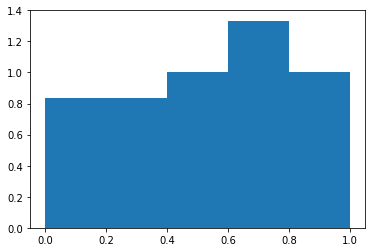

In [41]:
plt.hist(U_sample, bins=[i/5 for i in range(6)], density=True)

[0.055, 0.082, 0.093, 0.154, 0.164, 0.267, 0.297, 0.344, 0.361, 0.365, 0.427, 0.45, 0.462, 0.493, 0.503, 0.518, 0.64, 0.675, 0.683, 0.703, 0.715, 0.726, 0.758, 0.798, 0.835, 0.903, 0.904, 0.924, 0.942, 0.978]
[0.03333333333333333, 0.06666666666666667, 0.1, 0.13333333333333333, 0.16666666666666666, 0.19999999999999998, 0.2333333333333333, 0.26666666666666666, 0.3, 0.3333333333333333, 0.36666666666666664, 0.39999999999999997, 0.4333333333333333, 0.4666666666666666, 0.49999999999999994, 0.5333333333333333, 0.5666666666666667, 0.6, 0.6333333333333333, 0.6666666666666666, 0.7, 0.7333333333333333, 0.7666666666666666, 0.7999999999999999, 0.8333333333333333, 0.8666666666666666, 0.8999999999999999, 0.9333333333333332, 0.9666666666666666, 0.9999999999999999]
30


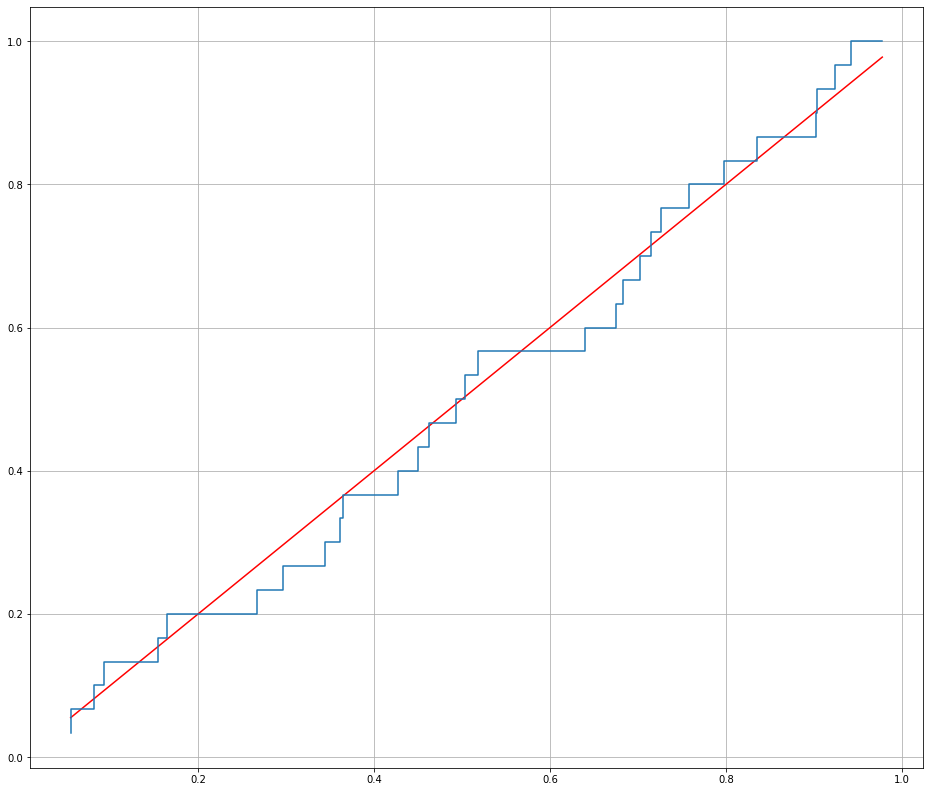

In [34]:
arrU, weightsU = getVar(U_sample, U_size)
print(arrU)
print(weightsU)
print(len(weightsU))
#plt.axis([0.01, 0.1, 0.01, 0.1])
plt.figure(figsize=(16,14))
plt.grid(True)
plt.plot(arrU, arrU, "red")
#plt.plot(np.sort(arrU), np.linspace(0, 1, len(arrU), endpoint=False))
plt.step(arrU, weightsU)
plt.show()
#plot_empirical(arrU, arrU)

In [59]:
#conf interval for mean when variance is known, with alpha
tau = sps.norm(0, 1).ppf([1-alpha/2])
print(tau)
a = sample_mean_of_N - (tau * np.sqrt(variance)) / np.sqrt(N_size)
b = sample_mean_of_N + (tau * np.sqrt(variance)) / np.sqrt(N_size)
print(a, b)

[1.95996398]
[1.8028436] [2.1948364]


In [60]:
#conf interval for variance when mean is known, with alpha
S_1 = 0
for x in N_sample:
  S_1 += (x - sample_mean_of_N)**2
S_1 = S_1 / (N_size-1) 
q = sps.chi2(N_size-1).ppf([alpha/2, 1 - alpha/2])
a = N_size * S_1 / q[1]
b = N_size * S_1 / q[0]
print(a, b)

0.3476618440752058 0.7736877967907905


In [66]:
#conf interval for variance when mean isn't known, with alpha
S_0 = 0
for x in N_sample:
  S_0 += (x - sample_mean_of_N) ** 2
S_0 = S_0 / (N_size-1) 
q = sps.chi2(N_size-1).ppf([alpha/2, 1 - alpha/2])
a = (N_size-1) * S_0 / q[1]
b = (N_size-1) * S_0 / q[0]
print(a, b)

0.34070860719370166 0.7582140408549746


In [65]:
#conf interval for mean when variance isn't known, with alpha
S_0 = 0
for x in N_sample:
  S_0 += (x - sample_mean_of_N)**2
S_0 = np.sqrt(S_0/(N_size-1))
q = sps.t(N_size-1).ppf([1 - alpha/2])
a = sample_mean_of_N - (q[0] * S_0 / np.sqrt(N_size))
b = sample_mean_of_N + (q[0] * S_0 / np.sqrt(N_size))
print(a, b)

1.8002530725433528 2.197426927456647


In [49]:
#Kolmogorov criterion
D = max( abs(weightsU[0] - arrU[0]), arrU[0] )
j = 0
l1 = [arrU[0]]
l2 = [D]
for i in range(1, len(arrU)):
  d = max(abs(weightsU[i]-arrU[i]), abs(weightsU[i-1]-arrU[i]))
  l1.append(arrU[i])
  l2.append(d)
  if d > D:
    j = arrU[i]
    D = d
#d = max(abs(weightsU[len(arrU)-1]-arrU[i]), abs(weightsU[len()]-arrU[i]))
#l1.append(arrU[len(arrU)-1])
#l2.append(d)
#if d > D:
#  D = d
#  j = arrU[len(arrU)-1]
#print(D, j)
for i in range(len(l1)):
  print('[',l1[i],',',l2[i], ']')
q = [1.11]
#q = 0.19032
print('D = ', D, ', D*sqrt(n) = ', np.sqrt(U_size)*D, ', quantile = ', q[0])
if np.sqrt(U_size)*D < q:
  print("Yes")
else: print("No")

[ 0.055 , 0.055 ]
[ 0.082 , 0.04866666666666667 ]
[ 0.093 , 0.026333333333333334 ]
[ 0.154 , 0.05399999999999999 ]
[ 0.164 , 0.030666666666666675 ]
[ 0.267 , 0.10033333333333336 ]
[ 0.297 , 0.097 ]
[ 0.344 , 0.11066666666666666 ]
[ 0.361 , 0.09433333333333332 ]
[ 0.365 , 0.065 ]
[ 0.427 , 0.09366666666666668 ]
[ 0.45 , 0.08333333333333337 ]
[ 0.462 , 0.062000000000000055 ]
[ 0.493 , 0.0596666666666667 ]
[ 0.503 , 0.036333333333333384 ]
[ 0.518 , 0.01800000000000007 ]
[ 0.64 , 0.10666666666666669 ]
[ 0.675 , 0.10833333333333339 ]
[ 0.683 , 0.08300000000000007 ]
[ 0.703 , 0.06966666666666665 ]
[ 0.715 , 0.04833333333333334 ]
[ 0.726 , 0.026000000000000023 ]
[ 0.758 , 0.024666666666666726 ]
[ 0.798 , 0.031333333333333435 ]
[ 0.835 , 0.03500000000000003 ]
[ 0.903 , 0.06966666666666677 ]
[ 0.904 , 0.03733333333333344 ]
[ 0.924 , 0.024000000000000132 ]
[ 0.942 , 0.024666666666666615 ]
[ 0.978 , 0.02199999999999991 ]
D =  0.11066666666666666 , D*sqrt(n) =  0.6061462969723839 , quantile =  1.1

In [69]:
#Chi2 criterion 1
left = []
right = []
N = 5
l = int(U_size/N)
pj = []
vj = []
for i in range(0, N):
  if i == 0:
      left.append(0.0)
      right.append(1/N)
  elif i < N-1:
    left.append(i/N)
    right.append((i+1)/N)
  else:
    left.append(i/N)
    right.append(1.0)
  k = 0
  for j1 in range(U_size):
    if (arrU[j1] >= left[i]) & (arrU[j1] <= right[i]):
      k+=1
  vj.append(k)
  pj.append(1/N)
  l+=l

rou = 0
q = sps.chi2(N-1).ppf([1-0.17])
for i in range(N):
  rou += (vj[i] - pj[i]*U_size)**2 / (U_size*pj[i])
if rou < q[0]:
  print("Yes, ", 'quantile = ', q[0], 'rou = ', rou)
else:
  print("Yes, ", 'quantile = ', q[0], 'rou = ', rou)
print(vj)

Yes,  quantile =  6.418477247645248 rou =  1.0
[5, 5, 6, 8, 6]


In [73]:
#Fisher's criterion for variances
S_01 = 0
for i in range(len(U1)):
  S_01 += (U1[i] - sample_mean_of_U1)**2
S_02 = 0
for i in range(len(U2)):
  S_02 += (U2[i] - sample_mean_of_U2)**2
S_01 /= (len(U1)-1)
S_02 /= (len(U2)-1)
rou = S_01 / S_02
q = sps.f(len(U1)-1, len(U2)-1).ppf([eps/2, 1 - eps/2])
#q = [0.6555]
print(q)
print('rou = ', rou, ',', 'quantile = ', q[0], q[1])
if (rou >= q[0]) & (rou <= q[1]):
  print("Yes") 
else: print("No") 
print(sample_mean_of_U1, sample_mean_of_U2)
print(S_01, S_02)

[0.54460699 1.74928228]
rou =  0.46654302326921515 , quantile =  0.5446069917861448 1.7492822751521224
No
1.9167999999999996 2.060866666666666
0.29290953684210524 0.6278296367816093


In [74]:
#Student's criterion for mean
rou = np.sqrt(len(U1) * len(U2) / (len(U1) + len(U2))) * (sample_mean_of_U1 - sample_mean_of_U2) / np.sqrt((S_01 * (len(U1) - 1) + S_02*(len(U2) - 1)) / (len(U1) + len(U2) - 2))
q = sps.t(len(U1) + len(U2) -2).ppf([0.915])
#q = [0.107298]
print('rou = ', np.abs(rou), ', ', 'quantile = ', q[0])
if np.abs(rou) < q[0]:
  print("Yes")
else: print("No")

rou =  0.7091510935233595 ,  quantile =  1.3931267903729048
Yes
